# **NEURAL NETWORKS**

![alt text](http://www.extremetech.com/wp-content/uploads/2015/07/NeuralNetwork.png)
*Figure 1*

###***INPUT LAYER ==>***
A NEURON FOR EVERY INPUT
It may sometimes be neccessary to modify our dataset so that it can be passed to our neural network.

Some common types of data a neural network uses are listed below.

- Vector Data (2D)
- Timeseries or Sequence (3D)
- Image Data (4D) (width, height, RGB)
- Video Data (5D) (width, height, RGB, time)



###***OUTPUT LAYER ==>***
CAN BE ONE NEURON AND THE CLASS IS DETERMINED BASED ON ITS VAL

```
INPUT LAYER           OUTPUT LAYER
  -> O                     O -> [0,1]
  -> O
  -> O

```


OR ONE NEURON FOR EACH CLASS, AND THE NEURONS VALS ARE THE PROBABILITY OF EACH CLASS

```
INPUT LAYER           OUTPUT LAYER
  -> O                     O -> 0.9
  -> O                     O -> 0.001
  -> O                     O -> 0.08
                           O -> 0.01
                           O -> 0.009

```

###***HIDDEN LAYERS ==>***
WE DON'T OBSERVE HIDDEN LAYERS

```
INPUT LAYER  HIDDEN LAYER   OUTPUT LAYER
  -> O            O
  -> O                          O ->
  -> O            O


```



***Neurons***

neuron is responsible for generating/holding/passing ONE numeric value.

its value is equal to the weighted sum of all previous nodes that are connected to it.

NEURONS ARE CONNECTED TO OTHER LAYERS USING WEIGHTS.

**DENSILY CONNECTED LAYER**:

A LAYER WHOSE NODES ARE CONNECTED TO EVERY NODE IN THE PREVIOUS LAYER


**TRAINABLE PARAMETERS**: THE VALS OF LINES THAT CONNECT THE NODES

**WEIGHTS**: THE FUNC THAT MAPS THE INPUT OF A NODE TO ITS OUTPUT OR THE STRENGTH OF THE CONNECTION BETWEEN THE 2 NODES

**BIASES**:
- CONST NUMERIC VAL
- ONLY ONE BIAS PER LAYER
- AFFECTS ONLY THE NODES CONNECTED TO IT FROM NEXT LAYER.
- IS NOT CONNECTED TO PREV LAYER (DOESN'T TAKE INPUTS IN INPUT LAYER)
- ITS CONNECTION WIEGHT IS TYPICALLY 1.0

```
INPUT LAYER  HIDDEN LAYER   OUTPUT LAYER
  -> O            O
  -> O                          O ->
  -> O            O
     B            B

```


---

The data at each subsequent neuron is defined as the following: (weighed sum eq)

> $Y =(\sum_{i=0}^n w_i x_i) + b$

> $w$ stands for the weight of each connection to the neuron

> $x$ stands for the value of the connected neuron from the previous value

> $b$ stands for the bias at previous layer

> $n$ is the number of connections to this neuron

> $Y$ is the output of the current neuron

> $\sum$ stands for sum

The bias $b$ allows us to shift the network up or down by a constant value. It is like the y-intercept of a line.

But that equation is the not complete one! We need **the activation function**. This is a function that we apply to the equation seen above to add complexity and dimensionality to our network.

A clear example for why activiation funcs are usefull is when we want one output node with a value between 0 and 1 with 0 being male for example and 1 being female

so our equation becomes:

> $Y =F((\sum_{i=0}^n w_i x_i) + b)$

> $F(x)$ is the activation func (Relu, tanh, sigmoid..)


Our network will start with predefined activation functions (they may be different at each layer) but random weights and biases.

As we train the network by feeding it data it will learn the correct weights and biases and adjust the network accordingly using a technqiue called **backpropagation** (explained below).

Once the correct weights and biases have been learned our network will hopefully be able to give us meaningful predictions in the output layer.

###Activation Function
Activation functions are simply a function that is applied to the weighed sum of a neuron.

They can be anything we want but are typically higher order/degree functions that aim to add a higher dimension to our data.

We would want to do this to introduce more comolexity to our model.

By transforming our data to a higher dimension, we can typically make better, more complex predictions.

A list of some common activation functions and their graphs can be seen below:

> - Relu (Rectified Linear Unit):
converts negative values to 0 and keeps positive values as is

 ![alt text](https://yashuseth.files.wordpress.com/2018/02/relu-function.png?w=309&h=274)


> - Tanh (Hyperbolic Tangent): maps (squiches) values to [-1, 1]

![alt text](http://mathworld.wolfram.com/images/interactive/TanhReal.gif)

> - Sigmoid: maps (squiches) values to [0, 1]


![alt text](https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png)



####Loss/Cost Function
In the training phase our network will make many mistakes and poor predicitions. In fact, at the start of training our network doesn't know anything (it has random weights and biases)!

We need some way of evaluating if the network is doing well and how well it is doing. For our training data we have the **features (input)** and the **labels (expected output)**, because of this we can compare the output from our network to the expected output.

Based on the difference between these values we can determine if our network has done a good job or poor job. If the network has done a good job, we'll make minor changes to the weights and biases. If it has done a poor job our changes may be more drastic.

So, this is where the cost/loss function comes in. This function is responsible for determining how well the network did. We pass it the actual output and the expected output, and it returns to us some value representing the cost/loss of the network.

**Some common loss/cost functions include.**
- Mean Squared Error
- Mean Absolute Error
- Hinge Loss

####Gradient Descent
Gradient descent and backpropagation are closely related. Gradient descent is the algorithm used to find the optimal paramaters (weights and biases) for our network, while backpropagation is the process of calculating the gradient that is used in the gradient descent step.

Gradient descent requires some pretty advanced calculus and linear algebra to understand so we'll stay away from that for now. Let's just read the formal definition for now.

"Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model." (https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)


![alt text](https://cdn-images-1.medium.com/max/1000/1*iU1QCnSTKrDjIPjSAENLuQ.png)


###Backpropagation
Backpropagation is the fundemental algorithm behind training neural networks. It is what changes the weights and biases of our network. it uses a cost/loss function.

###Optimizer
You may sometimes see the term optimizer or optimization function. This is simply the function that implements the backpropagation algorithm described above. Here's a list of a few common ones.
- Gradient Descent
- Stochastic Gradient Descent
- Mini-Batch Gradient Descent
- Momentum
- Nesterov Accelerated Gradient

*This article explains them quite well is where I've pulled this list from.*

(https://medium.com/@sdoshi579/optimizers-for-training-neural-network-59450d71caf6)

##LET'S BUILD A NEURAL NETWORK

In [ ]:
#imports:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

###Dataset
For this tutorial we will use the MNIST Fashion Dataset. This is a dataset that is included in keras.

This dataset includes 60,000 (28X28) images for training and 10,000 (28X28) images for validation/testing.

In [ ]:
# load the dataset from keras
fashion_mnist = keras.datasets.fashion_mnist

# split the dataset into training and testing
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
print(f'dataset shape is {train_images.shape}\n\nType is {type(train_images)}')


dataset shape is (60000, 28, 28)

Type is <class 'numpy.ndarray'>


In [ ]:
# one pixel (a number between 0 and 255)
## NOTE THAT THIS IMG IS IN GREYSCALE
train_images[0,23,23]

194

In [ ]:
# LET'S LOOK AT THE FIRST 10 LABELS
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
class_names = ['Tshirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

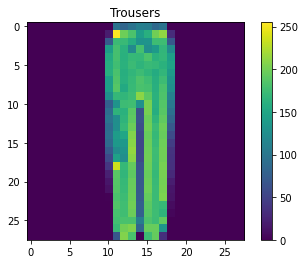

In [ ]:
# TO LOOK AT AN IMG:
img_index = 1000

plt.figure()
plt.imshow(train_images[img_index])
plt.title(class_names[train_labels[img_index]])
plt.colorbar()
plt.grid(False)
plt.show()

###Data Preprocessing

in this example, the pixel values are between 0 and 255.

It's always a good idea to avoid dealing with large values, let's map them to be between 0 and 1

In [ ]:
train_images = train_images/ 255.0
test_images = test_images/ 255.0

###Building the Model

this model will be:

- keras sequential model (feed-forward neural network i.e values pass left to right)
- 3 layers (1 input, 1 hidden, 1 output)
- softmax ==> MAKES SURE THAT ALL OUTPUTS ARE BETWEEN 0 AND 1 AND THAT THEY ADD UP TO 1

hyper-parameters: are parameters that we can manually tune such as number of hidden layers, number of neurons, activation funcs, optimiser, loss, metrics, epochs..)

weights and biases are not hyperparameters (you cannot manually tune)

In [ ]:
model = keras.Sequential([
    # specify the number of neurons in each layer
    keras.layers.Flatten(input_shape = train_images.shape[1:]),   # since the imgs are 2D, we need to flatten them to 1D to pass them in the input layer
    keras.layers.Dense(128, activation = 'relu'),    # no answer to why we chose 128 neurons!!
    keras.layers.Dense(len(class_names), activation = 'softmax')   # we  need a probability for each class name
    # softmax ==> MAKES SURE THAT ALL OUTPUTS ARE BETWEEN 0 AND 1 AND THAT THEY ADD UP TO 1
])

###Compiling the Model

you have to compile the model before training it.

you specify the loss func, optimizer and metrics that you want to track

check optimizers here:
https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

check loss here:
https://www.tensorflow.org/api_docs/python/tf/keras/losses

check metrices:
https://www.tensorflow.org/api_docs/python/tf/keras/metrics

In [ ]:
model.compile(optimizer = 'adam',   # the gradient decent algorithm
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

###Training the Model

In [ ]:
model.fit(train_images, train_labels, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5038 - accuracy: 0.8240
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3764 - accuracy: 0.8649
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3387 - accuracy: 0.8766
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3127 - accuracy: 0.8879
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2947 - accuracy: 0.8915
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2803 - accuracy: 0.8961
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2684 - accuracy: 0.9009
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2571 - accuracy: 0.9042
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2473 - accuracy: 0.9069
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.23

###Evaluating/ Testing the Model

indications for overfitting are:
- when the accuracy of test data is lower than training data
- when training accuracy is very very high

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1)
# verbose is how much is being printed on console

print('test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3551 - accuracy: 0.8838
test accuracy: 0.8838000297546387


###Predictions

now let's use our model to make predictions

In [ ]:
predictions = model.predict(test_images)

# to view the values of the output layer (the predictions of all classes names):
img_index = 0
print(predictions[img_index])

# .predict expects a list, if you wan to predict for one img only do:
# prediction = model.predict([test_images[0]])


[6.8994609e-13 6.5003417e-15 3.5920901e-15 2.6683761e-15 3.9686147e-13
 3.1115727e-07 9.6846517e-11 1.2253209e-03 1.2739622e-12 9.9877435e-01]


6
Shirt


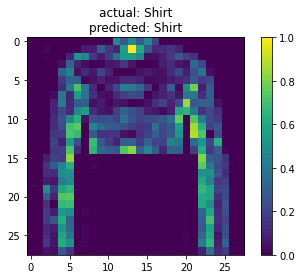

In [ ]:
img_index = 909

# to view the most probable class name:
## this will be the index of the biggest value in the list of predictions
print(np.argmax(predictions[img_index]))

# now let's try show the class name itself
print(class_names[np.argmax(predictions[img_index])])

# let's view the img:
plt.figure()
plt.imshow(test_images[img_index])
plt.title(f'actual: {class_names[test_labels[img_index]]}\npredicted: {class_names[np.argmax(predictions[img_index])]}')
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# THIS IS A COOL SCRIPT THAT TAKES AN IMG INDEX AS INPUT AND SHOWS THE ACTUAL CLASS NAME VS THE PREDICTED CLASS NAME

COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
